# Lecture 13 - Nonlinear equations

Let's explore several other methods for solving nonlinear equations.

Instead of equations of the form $x=f(x)$, we can rearrange them to the form $f(x)=0$, and then find the roots.

In [1]:
%matplotlib inline
import numpy
import scipy.misc
import scipy.optimize
import matplotlib.pyplot as plot

#### Bisection (or binary) method

At the root point, where $f(x)$ crosses the $x$-axis, the sign of $f(x)$ changes. If we pick two points $a,b$ where the $\mathrm{sgn}(f(a))$ is the oppoiste of $\mathrm{sgn}(f(b))$, then we know that the root is in between $a,b$.

Pseudocode for the bisection method is here:

`bisection_method`($f(x)$, $a$, $b$, $\gamma$)
1. Compare $\mathrm{sgn}(f(a))$ and $\mathrm{sgn}(f(b))$
    -  If they are equal exit with `None`
2. $\epsilon=|a-b|$
3. Repeat while $\epsilon>\gamma$ :
    -  $x'=0.5(a+b)$
    -  if $\mathrm{sgn}(f(a)) = \mathrm{sgn}(f(x'))$ :
         - $a=x'$
    -  else :
         - $b=x'$
    -  $\epsilon=|a-b|$
4. Return $x'$ and $\epsilon$

#### Example 1

Use [`scipy.optimize.bisect`][1] to find the roots of 
$$x^2-1=0$$

[1]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html

Root between 0 and 2 : 1.0
Root between -2 and 0 : -1.0


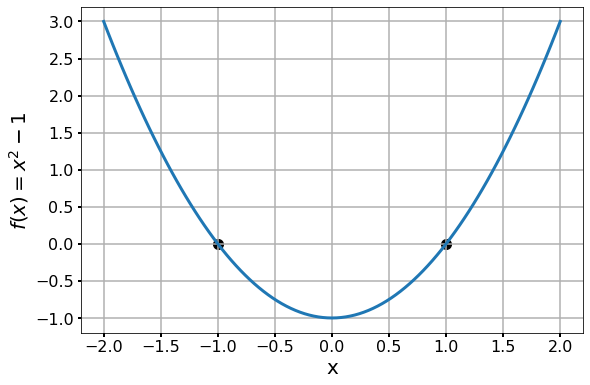

In [2]:
def f(x):
    return (x**2 - 1)

# CREATE A DATA ARRAY TO PLOT
x = numpy.linspace(-2,2,101)
y=f(x)


root1 = scipy.optimize.bisect(f, 0, 2)
print("Root between 0 and 2 :", root1)
root2 = scipy.optimize.bisect(f, -2, 0)
print("Root between -2 and 0 :", root2)


plot.figure(figsize=(9,6))
plot.tick_params(axis='both', which='major', labelsize=16, labelcolor="black", width=2)
plot.ylabel(r"$f(x)=x^2-1$", fontsize=20)
plot.xlabel(r"x", fontsize=20)
# PLOT THE FUNCTION
plot.plot(x,y,'tab:blue',linewidth=3)
# PLOT THE TWO ROOTS
plot.scatter(root1,0,s=100,c='black')
plot.scatter(root2,0,s=100,c='black')
plot.grid(True,linewidth=1.5,axis="both")
plot.show()
plot.close("all")

#### Example 2
For a finite square well of height $V$ and width $w$ such as shown here,
<img src="./images/smallwell.png"/>

Schrodinger's equation can be used to show the allowed energies $E$ of a single particle of mass $m$ obund inside the well are solutions of 
$$\tan\left(\sqrt{\frac{w^2mE}{2\hbar^2}}\right)=\sqrt{\frac{V-E}{E}}\ \textrm{ for even numbered solutions, and}$$
$$\tan\left(\sqrt{\frac{w^2mE}{2\hbar^2}}\right)=-\sqrt{\frac{E}{V-E}}\ \textrm{ for odd numbered solutions}$$
The first solution (the ground state) is numbered 0, the second is 1, and so on.

Let an electron be trapped in the well of $V=20$ eV and $w=1$ nm. 

First, make a plot of the three functions above on the same graph. Set the limits of the y-axis to be -10 to 10, and the range of $E$ values from 0 to 20 eV. How many bound states are there?

Use `scipy.optimize.bisect` to solve for all the roots between $E=0\rightarrow20$eV. Use the figure to help find the starting guesses.

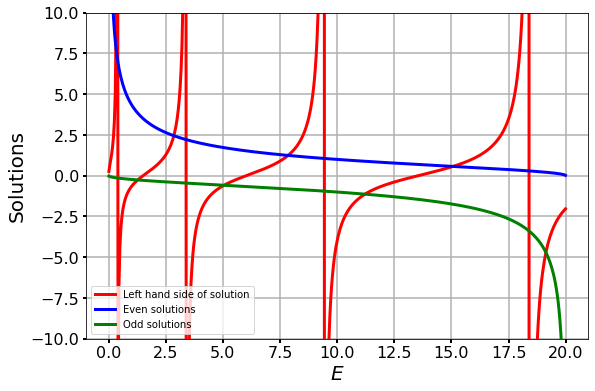

In [3]:
width = 1E-9       # (m)
mass  = 9.1094E-31 # (kg)
hbar  = 1.0546E-34 # (J.s)
V     = 20.0       # (eV)
J2eV  = 1.6022E-19 # (J/eV)

alpha = width*width*mass*J2eV/(2.0*hbar*hbar)

E = numpy.linspace(0.01,19.99,501) # (eV)

y1 = numpy.tan(numpy.sqrt(alpha*E))
y2 = numpy.sqrt((V-E)/E)
y3 = -numpy.sqrt(E/(V-E))

plot.figure(figsize=(9,6))
plot.tick_params(axis='both', which='major', labelsize=16, labelcolor="black", width=2)
plot.xlabel(r"$E$", fontsize=20)
plot.ylabel(r"Solutions", fontsize=20)
plot.plot(E,y1,'r-',linewidth=3,label="Left hand side of solution")
plot.plot(E,y2,'b-',linewidth=3,label="Even solutions")
plot.plot(E,y3,'g-',linewidth=3,label="Odd solutions")
plot.ylim(-10,10)
plot.legend()
plot.grid(True,linewidth=1.5,axis="both")
plot.show()
plot.close("all")

In [4]:
width = 1E-9       # (m)
mass  = 9.1094E-31 # (kg)
hbar  = 1.0546E-34 # (J.s)
V     = 20.0       # (eV)
J2eV  = 1.6022E-19 # (J/eV)

alpha = width*width*mass*J2eV/(2.0*hbar*hbar)

#------------------------ 
def even_solutions(E):
    y1 = numpy.tan(numpy.sqrt(alpha*E))
    y2 = numpy.sqrt((V-E)/E)
    return y1-y2
#------------------------ 
def odd_solutions(E):
    y1 = numpy.tan(numpy.sqrt(alpha*E))
    y2 = -numpy.sqrt(E/(V-E))
    return y1-y2
#------------------------ 

root = scipy.optimize.bisect(even_solutions, 0.01,  0.35)
print(f"E0 = {root:1.4f}, eV")
# From now on I will skip storing the solution, and just calculate the result
# within the print statement.
print(f"E1 = {scipy.optimize.bisect(odd_solutions,  0.80,  2.00):1.4f}, eV")
print(f"E2 = {scipy.optimize.bisect(even_solutions, 2.00,  3.10):1.4f}, eV")
print(f"E3 = {scipy.optimize.bisect(odd_solutions,  4.00,  6.50):1.4f}, eV")
print(f"E4 = {scipy.optimize.bisect(even_solutions, 6.50,  9.00):1.4f}, eV")
print(f"E5 = {scipy.optimize.bisect(odd_solutions, 10.00, 13.50):1.4f}, eV")
print(f"E6 = {scipy.optimize.bisect(even_solutions,13.50, 17.00):1.4f}, eV")
print(f"E7 = {scipy.optimize.bisect(odd_solutions, 18.80, 19.80):1.4f}, eV")

E0 = 0.3179, eV
E1 = 1.2701, eV
E2 = 2.8511, eV
E3 = 5.0506, eV
E4 = 7.8501, eV
E5 = 11.2155, eV
E6 = 15.0711, eV
E7 = 19.1350, eV


#### Newton's method

[Newton's method][1] is an iterative search that uses the slope of the function (in other words $f'(x)$) to help set the direction and size of the steps. The method does not search within a range, but from a starting guess.
<figure>
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif" width=600/>
    <center><figcaption><a href="https://commons.wikimedia.org/wiki/File:NewtonIteration_Ani.gif">Permission gnufdl</a></figcaption></center>
</figure>

Start with a Taylor series again, near the root, and at the starting guess, point $x_0$. To first order this is

$$
f(x) = f(x_0) + f'(x_0)(x-x_0) + \ldots
$$

For the next step, we want to move towards the root by an amount $\Delta x = x-x_0$. If $f(x)$ is at the root, then the left hand side is zero and we have

$$
\Delta x = -\frac{f(x_0)}{f'(x_0)}
$$

After moving our guess point, then recalculate $f(x)$ and $f'(x)$, and repeat the process. 

Python uses [`scipy.optimize.newton`][2] to find a zero of the function `func` given a nearby starting point `x0`.

[1]: https://en.wikipedia.org/wiki/Newton%27s_method
[2]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html

#### Example 3
Find the roots of
$$x^3-1=0.$$
- Use your own Newton's method.
- Use `scipy.optimize.newton` using only the first derivative.
- Use `scipy.optimize.newton` with both the first and second derivative.

In [5]:
def f(x):
    return (x**3 - 1)  # only one real root at x = 1

def fp(x):
    return (3*x**2)

def fpp(x):
    return (6*x)

x0 = 5.5
fx0 = f(x0)
iteration = 0
while numpy.abs(fx0)> 1e-8:
    fx0  = f(x0)
    fpx0 = fp(x0)
    dx = -fx0/fpx0
    x0 += dx
    iteration += 1
    
print(f"Newton's method with first derivative: {x0}")
print(f"Solved in {iteration} iterations.")

x0 = 15.0
root = scipy.optimize.newton(f, x0, fprime=fp)
print(f"Scipy Newton's method with first derivative: {root}")

x0 = 15.5
root = scipy.optimize.newton(f, 1.5, fprime=fp, fprime2=fpp)
print(f"Scipy Newton's method with first and second derivatives: {root}")

x0 = 15.5
root, output = scipy.optimize.newton(f, 1.5, full_output=True)
print(f"Scipy Newton's method with no derivatives: {root}")
print("Scipy full output:\n",output)

Newton's method with first derivative: 1.0
Solved in 9 iterations.
Scipy Newton's method with first derivative: 1.0
Scipy Newton's method with first and second derivatives: 1.0
Scipy Newton's method with no derivatives: 1.0000000000000016
Scipy full output:
       converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 1.0000000000000016


#### Example 4

Use Newton's method to find all six roots of 

$$
924x^6-2772x^5+3150x^4-1680x^3+420x^2-42x+1
$$ 
All the roots fall in the range $x=0\rightarrow1$.
To help, you should make a plot of the function first, to get an idea of where the zeros are. 

What happens if you do not supply the derviative function (`fprime=None`) to the search for the last root, starting the search at 0.9?  Was you guess close enough to find the correct root?

Note that the polynomial here is the sizth Legendre polynomial mapped to the interval of zero to one. Therefore, this calculation is exactly what you would do to find the integration points for a 6-point Gaussian quarature!

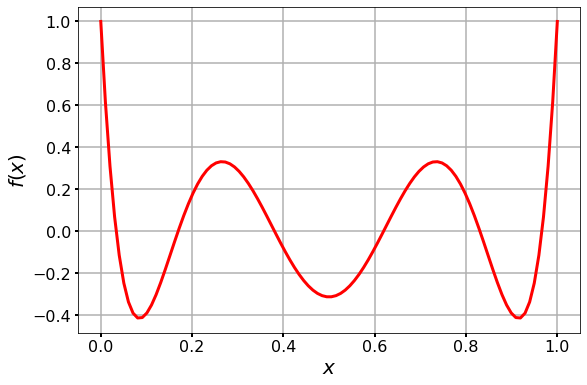

In [6]:
def f(x) :
    return 924*x**6-2772*x**5+3150*x**4-1680*x**3+420*x**2-42*x+1

x_points = numpy.linspace(0.,1.,100)
y_points = f(x_points)

plot.figure(figsize=(9,6))
plot.tick_params(axis='both', which='major', labelsize=16, labelcolor="black", width=2)
plot.xlabel(r"$x$", fontsize=20)
plot.ylabel(r"$f(x)$", fontsize=20)
plot.plot(x_points,y_points,'r-',linewidth=3)
plot.grid(True,linewidth=1.5,axis="both")
plot.show()
plot.close("all")

In [7]:
def f(x) :
    return 924*x**6-2772*x**5+3150*x**4-1680*x**3+420*x**2-42*x+1

def fp(x) :
    return 924*6*x**5-2772*5*x**4+3150*4*x**3-1680*3*x**2+420*2*x-42

print("Root  1 :", scipy.optimize.newton(f,0.0,fprime=fp))
print("Root  2 :", scipy.optimize.newton(f,0.2,fprime=fp))
print("Root  3 :", scipy.optimize.newton(f,0.4,fprime=fp))
print("Root  4 :", scipy.optimize.newton(f,0.6,fprime=fp))
print("Root  5 :", scipy.optimize.newton(f,0.8,fprime=fp))
print("Root  6 :", scipy.optimize.newton(f,0.9,fprime=fp))
print("----------------------------")
# Without supplying the first derivative, the secant method
# estimate of the derivative changes the best starting point for this root.
# We need to make a *better* guess to arrive at the correct root.
print("Root  6 :", scipy.optimize.newton(f,0.9,fprime=None)) 
print("Root  6 :", scipy.optimize.newton(f,0.99,fprime=None))

Root  1 : 0.033765242898423545
Root  2 : 0.16939530676686765
Root  3 : 0.3806904069584
Root  4 : 0.619309593041593
Root  5 : 0.8306046932330717
Root  6 : 0.9662347571015693
----------------------------
Root  6 : 0.8306046932331217
Root  6 : 0.9662347571016908


In [10]:
# NEW PYTHON IDEA !
# When evaluating a user-defined function, the extra
# parameters needed to evaluate it, such as these
# polynomial constants, may be passed to the user-function
# as a tuple (a list of constants).
args1 = (924,  # a
         -2772,  # b
         3150,  # c
         -1680,  # d
         420,  # e
         -42,  # f
         1)  # g

args2 = (924,  # a
         -2772,  # b
         1150,  # c
         -1380,  # d
         420,  # e
         -42,  # f
         1)  # g


def poly6(x, *args):
    a, b, c, d, e, f, g = args
    return a*x**6+b*x**5+c*x**4+d*x**3+e*x**2+f*x+g


xguess = 0.29
root = scipy.optimize.newton(poly6, xguess, fprime=None, args=args2)
print(f"Root : {root:8.6f}")


Root : 0.034261
